# Basic Graph Analysis
* Based on notes from COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/* 

In this lecture, we explore how to work with graphs in Python. We will use the [NetworkX](networkx.github.io) library. 

Alternative libraries are [graph-tool](https://graph-tool.skewed.de) and [iGraph](http://igraph.org/). We have chosen NetworkX because it's native Python and hence easy to install. Graph-tool is said to be faster, but requires manual installation. 


NetworkX supports four types of graphs: 

 * **Graph:** This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.
 * **DiGraph:** Directed graphs, that is, graphs with directed edges. 
 * **MultiGraph:** A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.
 * **MultiDiGraph:** A directed version of a MultiGraph.
 

We start off by creating a simple graph containing scholars, and connect the authors based on co-authored publications.  We can use the `add_node()` and `add_edge()` functions to add the respective entities. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:

#initailize the graph
authors=nx.Graph()
# add nodes
authors.add_node("Alex")
authors.add_node("Marc")
authors.add_node("Wolfgang")
authors.add_node("Helwig")

# add edges
authors.add_edge("Alex", "Marc")
authors.add_edge("Marc", "Wolfgang")
authors.add_edge("Marc", "Helwig")
authors.add_edge("Helwig", "Alex")

print(list(authors.nodes()))
print(list(authors.edges()))


['Alex', 'Marc', 'Wolfgang', 'Helwig']
[('Alex', 'Marc'), ('Alex', 'Helwig'), ('Marc', 'Wolfgang'), ('Marc', 'Helwig')]


We can also add nodes implicitly: 

In [3]:
# The node Hanspeter didn't exist before
authors.add_edge( "Alex", "Hanspeter" )
authors.add_edge( "Helwig", "Hanspeter" )

print( list( authors.nodes() ) )
print( list( authors.edges() ) )

['Alex', 'Marc', 'Wolfgang', 'Helwig', 'Hanspeter']
[('Alex', 'Marc'), ('Alex', 'Helwig'), ('Alex', 'Hanspeter'), ('Marc', 'Wolfgang'), ('Marc', 'Helwig'), ('Helwig', 'Hanspeter')]


We can add attributes of various types, including basic data types, lists, dictionaries:

In [4]:
authors.nodes["Hanspeter"]["Institution"] = "Harvard"
authors.nodes["Alex"]["Institution"] = "UofU"
authors.nodes["Marc"]["Institution"] = ["JKU", "datavisyn"]
nx.get_node_attributes( authors, "Institution" )
authors.nodes( data=True )

NodeDataView({'Alex': {'Institution': 'UofU'}, 'Marc': {'Institution': ['JKU', 'datavisyn']}, 'Wolfgang': {}, 'Helwig': {}, 'Hanspeter': {'Institution': 'Harvard'}})

We can access individual nodes:

In [5]:
authors.nodes[ "Marc" ]

{'Institution': ['JKU', 'datavisyn']}

And the neighbors of nodes:

In [6]:
authors[ "Marc" ]

AtlasView({'Alex': {}, 'Wolfgang': {}, 'Helwig': {}})

### Exercise: 

Create a new graph with you and some of your friends so you have about 5-8 nodes and 10-15 links. Add attributes to each of your friends, such as their age, where they went to school, etc. Print the nodes and links.

## Visualizing the Graph

NetworkX isn't a particular good graph visualization library. For good graph visualization, take a look at [D3](https://d3js.org/) if you want to write JavaScript code, or [Cytoscape](http://www.cytoscape.org/) or [Gephi](https://gephi.org/) if you want a GUI tool.

We'll make due with NetworkX's vis capabilities here though. NetworkX uses Matploltlib to draw it's graph. 

Let's start with a force-directed layout:

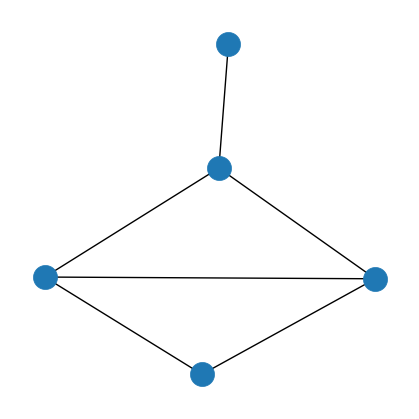

In [7]:
plt.figure( figsize=(4,4) )

# Use a spring layout to calculate positions and plot them
nx.draw_spring( authors )
plt.show()

This clearly shows us the topology, but we want also to know who is who, so we add labels:

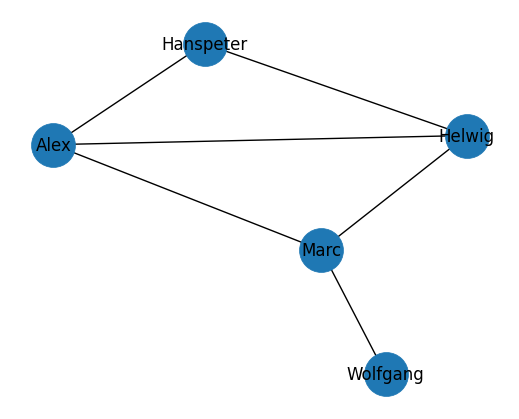

In [8]:
plt.figure( figsize=(5,4) )

# Here we calculate the layout positions first
pos = nx.spring_layout(authors)
# and then pass the positions to the drawing function
nx.draw(authors, pos=pos, node_size=1000)
# then we draw the labels at the same position
nx.draw_networkx_labels(authors, pos=pos)
plt.show()

Alternatively we can use a shell layout, that places the nodes on a circle/ellipsoid:

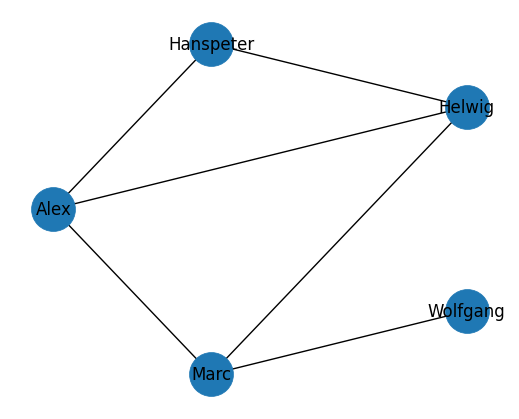

In [9]:
plt.figure( figsize=(5,4) )

pos = nx.shell_layout( authors )
nx.draw( authors, pos=pos, node_size=1000 )
nx.draw_networkx_labels( authors, pos=pos )
plt.show()

NetworkX does support a couple of other node-link layouts, but it does not support matrix layouts. 

## Basic Stats

Let's take a look at a couple of basic stats about the network:

In [11]:
#print( nx.info(authors) )

Here we see the size of the network in terms of nodes and edges, plus the average degree. We can look at the degree of each node:

In [12]:
degree = nx.degree(authors)
degree

DegreeView({'Alex': 3, 'Marc': 3, 'Wolfgang': 1, 'Helwig': 3, 'Hanspeter': 2})

And we can visualize these degrees as the size of the nodes. First, a helper function to draw the network:

In [13]:
def draw_network( weights ):
    pos = nx.spring_layout( authors )
    nx.draw( authors, pos=pos, node_size=weights )
    nx.draw_networkx_labels( authors, pos=pos )
    plt.show()

And then we need to rescale the node size by a factor, so that it's visible:

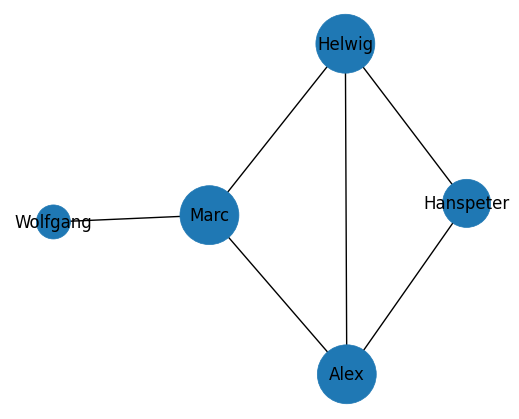

In [14]:
plt.figure( figsize=(5,4) )

scaled_degree = []
for node in authors.nodes():
    scaled_degree.append( degree[node]*600 )

draw_network( scaled_degree )

It is also trivial to show a degree histogram. Remember, that degree histograms tell us a lot about the network.

Degrees: [3, 3, 1, 3, 2]


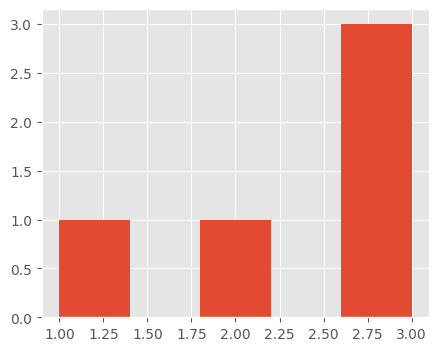

In [15]:
plt.figure( figsize=(5,4) )

degrees = [node[1] for node in degree]
print ( "Degrees:", degrees )

plt.hist( degrees, bins=5 )
plt.show()

For this network, that's not particularly interesting, but we'll take a look at a larger graph next.

### Exercise

Draw your friends network as a node link diagram, with the nodes scaled by the degree. Draw a degree histogram of your friends network.

## Importing and Generating Graphs

There are various ways to [generate simulated graphs](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), which are great if you want to try out an algorithm or a visualization method. NetworkX also comes with a set of [pre-loaded graphs](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html#module-networkx.generators.social). 

We'll use data based on character co-appearance in Victor Hugo's Les Misérables, compiled by [Donald Knuth](http://www-cs-faculty.stanford.edu/~uno/sgb.html). NetworkX supports [various formats](https://networkx.github.io/documentation/networkx-1.10/reference/readwrite.html), including JSON, GraphML, etc. We'll use the [GML format](https://networkx.readthedocs.io/en/stable/reference/readwrite.gml.html), that looks like this:

```
{
graph [
  node [
    id 0
    label "Myriel"
  ]
  node [
    id 1
    label "Napoleon"
  ]
  node [
    id 2
    label "MlleBaptistine"
  ]
  
  ...
  
  edge [
    source 1
    target 0
    value 1
  ]
  edge [
    source 2
    target 0
    value 8
  ]
  ...
```

Importing GML is trivial if the file is properly formatted. Other formats, such as JSON, can be a little more work as they are less clearly specified. 

In [16]:
# Read the graph file
lesmis = nx.read_gml( 'lesmis.gml' )

# Plot the nodes
lesmis.nodes()

NodeView(('Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'))

Let's look at the stats for this graph:

In [17]:
print( "Type:", type( lesmis ) )
print( "Num nodes:", len( lesmis.nodes ) )
print( "Num edges:", len( lesmis.edges ) )
print( "Name:", lesmis.name )

total_deg = 0
for _, deg in lesmis.degree():
    total_deg += deg

total_deg /= len( lesmis.nodes )

print( "Average degree: %.3f" % total_deg )


Type: <class 'networkx.classes.graph.Graph'>
Num nodes: 77
Num edges: 254
Name: 
Average degree: 6.597


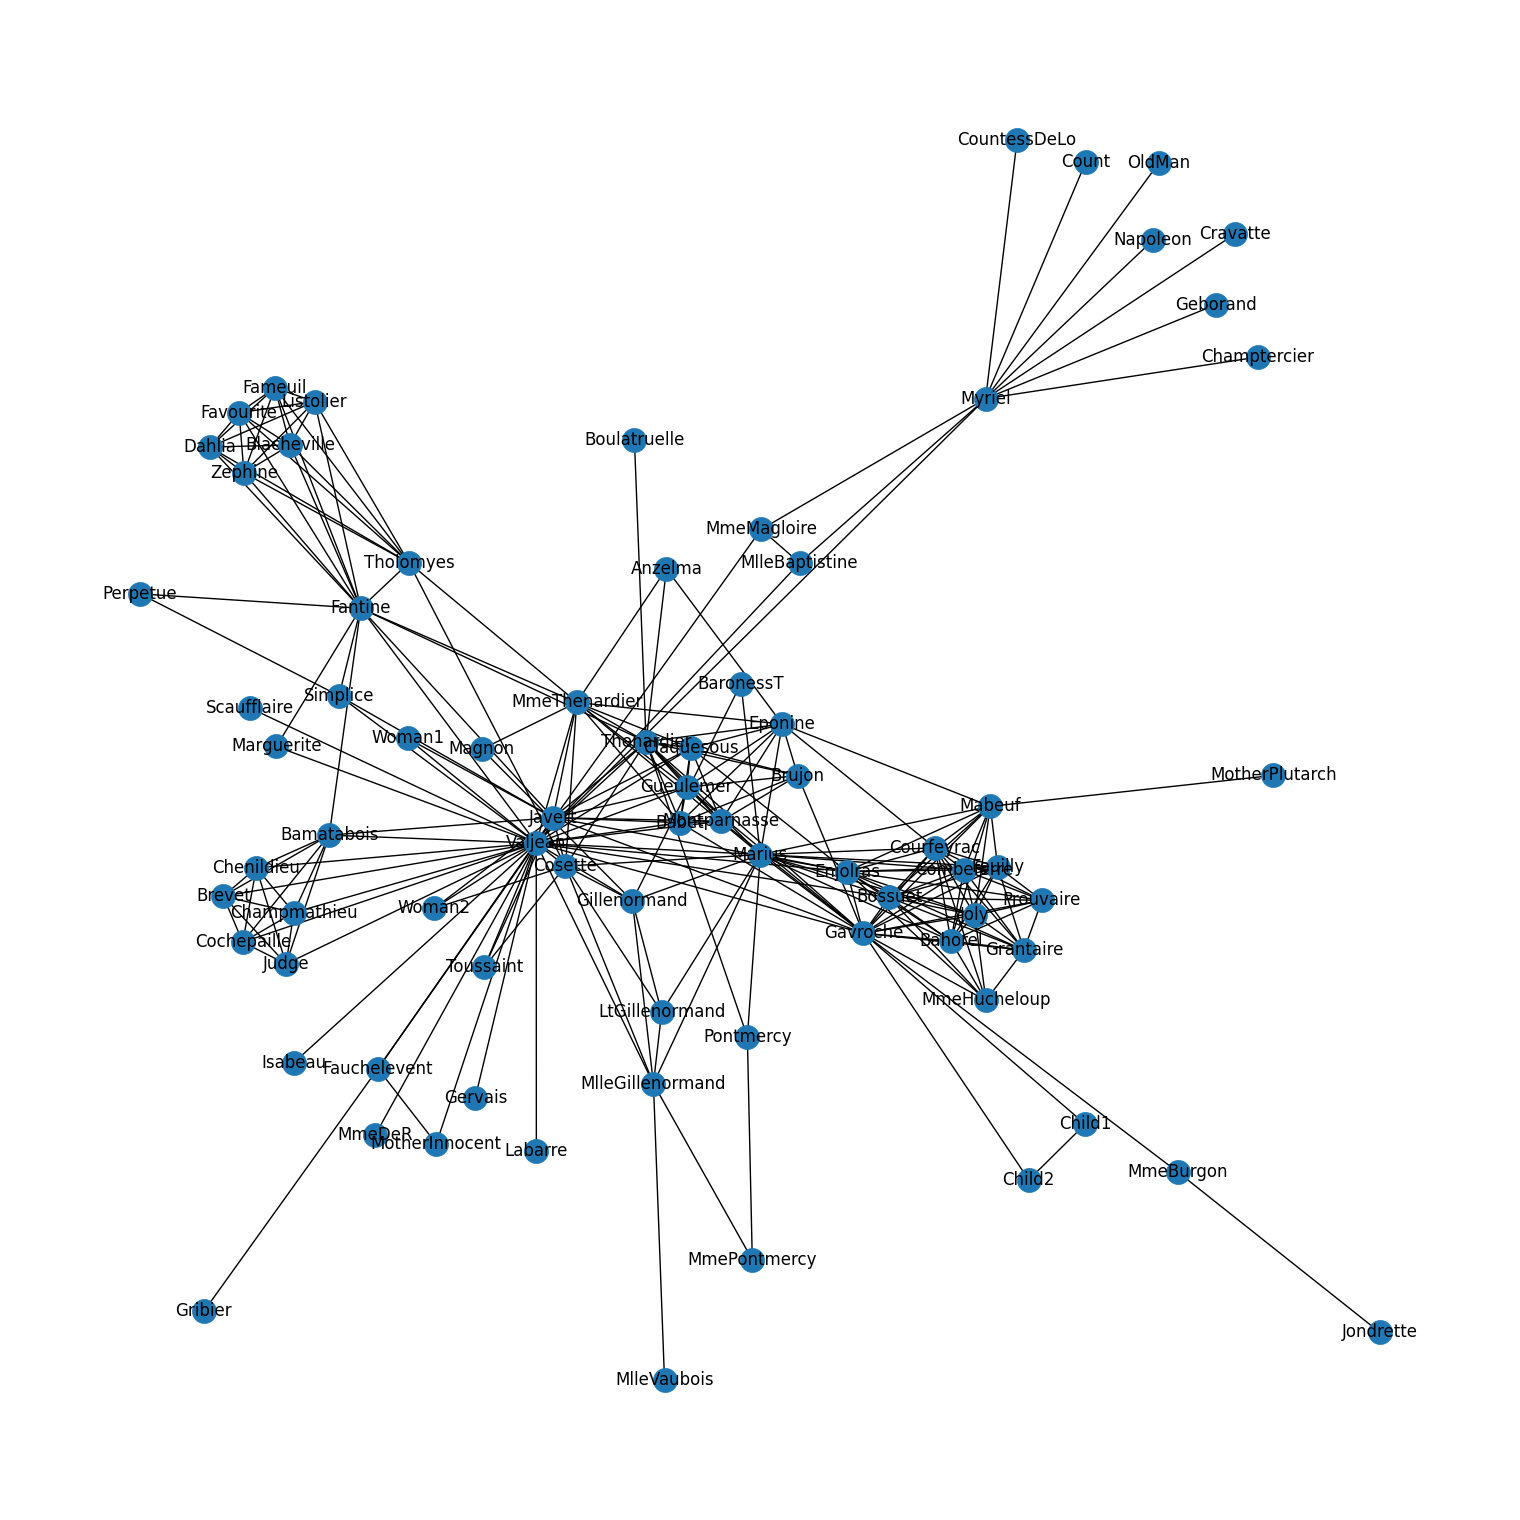

In [18]:
# Another way to set figure size...
plt.rcParams['figure.figsize'] = (15, 15)

pos = nx.spring_layout( lesmis )
nx.draw( lesmis, pos=pos )
nx.draw_networkx_labels( lesmis, pos=pos )
plt.show()

## Connectedness Measures

Connectedness measures provide information about the relative roles of nodes in a graph. This is important, for example, to rank nodes, or to identify nodes that are critical to the network, keeping it connected. We'll look at three measures: degree, betweenness centrality, and page rank. 

Here we write a helper function that allows us to plot with weights:

In [19]:
def draw_network_fancy(graph, weights, drawing_factor):
    node_scale = []
    for node in graph.nodes():
        node_scale.append(weights[node]*drawing_factor)
        
    
    plt.rcParams['figure.figsize'] = (10, 15)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos=pos, node_size=node_scale)
    nx.draw_networkx_labels(graph, pos=pos)
    plt.show()

### Degree

We first look at the degree of nodes. Degree is a local measure - we could envision one node with a large degree that is not central to the overall network. 

In [20]:
degree = nx.degree( lesmis )
print( "Popular:", sorted( degree, key=lambda x: x[1], reverse=True )[:10] )
print( "\nNot as: ", sorted( degree, key=lambda x: x[1], reverse=True )[-10:] )

Popular: [('Valjean', 36), ('Gavroche', 22), ('Marius', 19), ('Javert', 17), ('Thenardier', 16), ('Fantine', 15), ('Enjolras', 15), ('Courfeyrac', 13), ('Bossuet', 13), ('Bahorel', 12)]

Not as:  [('Labarre', 1), ('MmeDeR', 1), ('Isabeau', 1), ('Gervais', 1), ('Scaufflaire', 1), ('Boulatruelle', 1), ('Gribier', 1), ('Jondrette', 1), ('MlleVaubois', 1), ('MotherPlutarch', 1)]


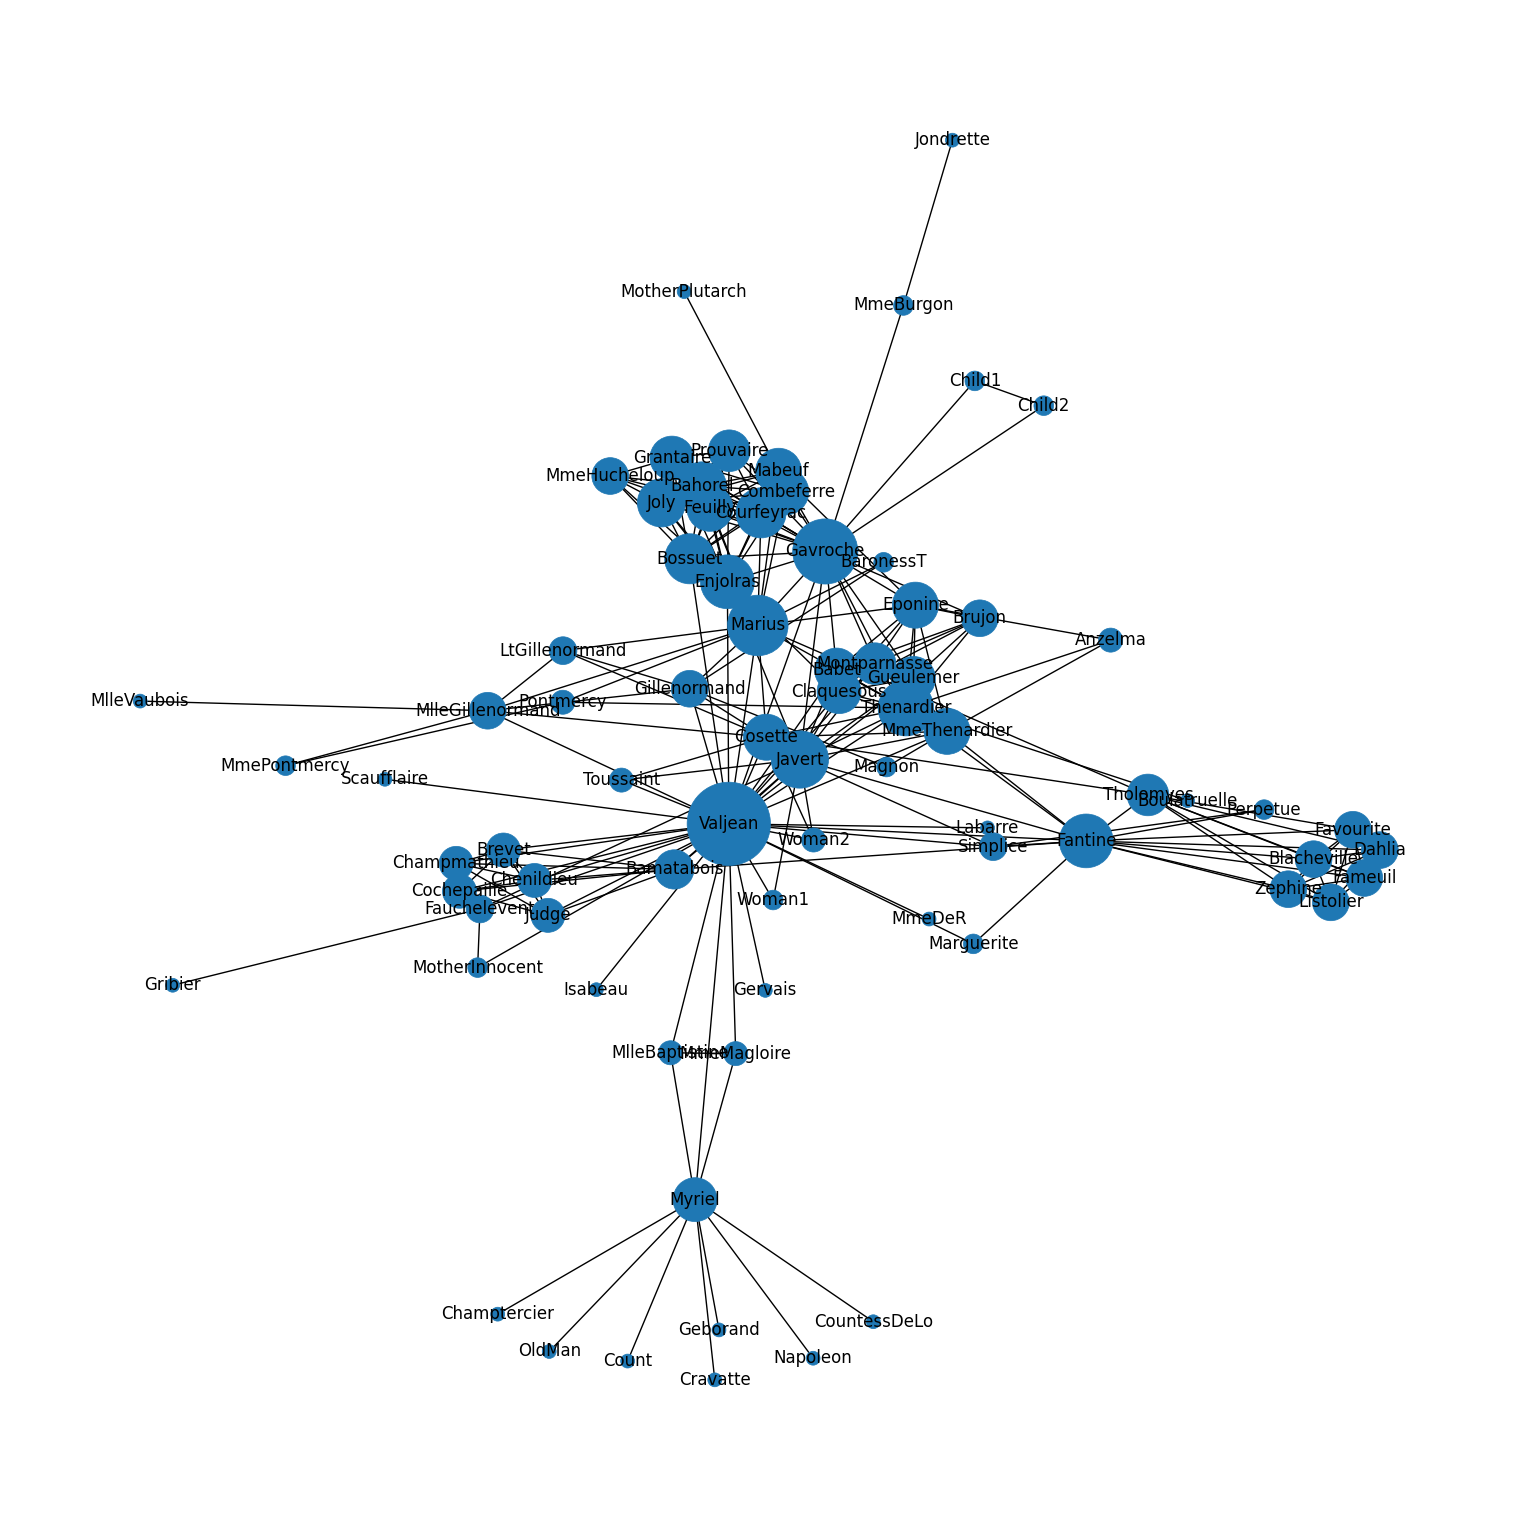

In [21]:
plt.figure( figsize=(15,15) )

draw_network_fancy( lesmis, degree, 100 ) # Scaled nodes based on degree

### Betweenness centrality

The betweenness centrality of a node is a measure of how many shortest paths (of all shortest paths between all nodes) pass through that particular node. The more shortest paths that pass through the vertex, the more central the vertex is to the network. Betweenness centrality is a good measure for the overall relevance of a node in a graph.

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v

$c_B(v) =\sum_{s\ne v \ne t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$

where $V$ is the set of nodes, $\sigma(s, t)$ is the number of shortest $(s, t)$-paths, and $\sigma(s, t|v)$ is the number of those paths passing through $v$.

In [22]:
# Initailize the graph
bz_demo=nx.Graph()

# Add nodes
bz_demo.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
bz_demo.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('D', 'F'), ('E', 'F')])

centrality = nx.betweenness_centrality(bz_demo)
sorted( centrality.items(), key=lambda x: x[1], reverse=True )[:10]

[('C', 0.65),
 ('B', 0.4),
 ('D', 0.15000000000000002),
 ('E', 0.15000000000000002),
 ('F', 0.05),
 ('A', 0.0)]

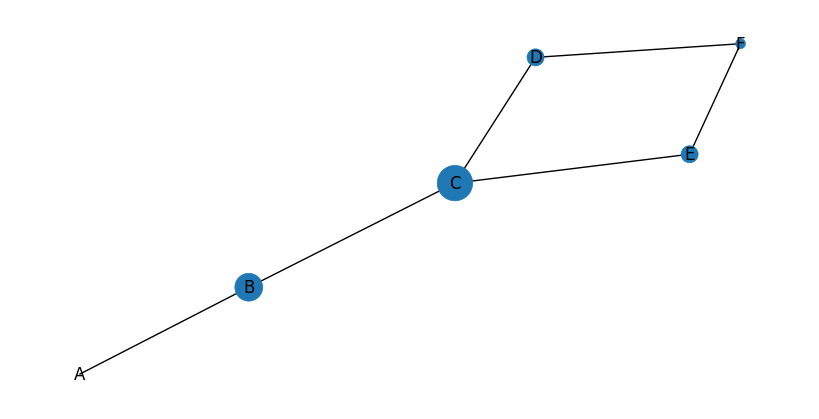

In [23]:
plt.figure( figsize=( 8,4 ) )

draw_network_fancy( bz_demo, centrality, 1000 )

In [24]:
centrality = nx.betweenness_centrality(lesmis)
sorted( centrality.items(), key=lambda x: x[1], reverse=True )[:10]

[('Valjean', 0.5699890527836184),
 ('Myriel', 0.17684210526315788),
 ('Gavroche', 0.16511250242584766),
 ('Marius', 0.132032488621946),
 ('Fantine', 0.12964454098819422),
 ('Thenardier', 0.07490122123424225),
 ('Javert', 0.05433155966478436),
 ('MlleGillenormand', 0.047598927875243675),
 ('Enjolras', 0.0425533568221771),
 ('Tholomyes', 0.04062934817733579)]

(array([19.,  6., 23.,  5.,  7.,  7.,  3.,  3.,  1.,  3.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

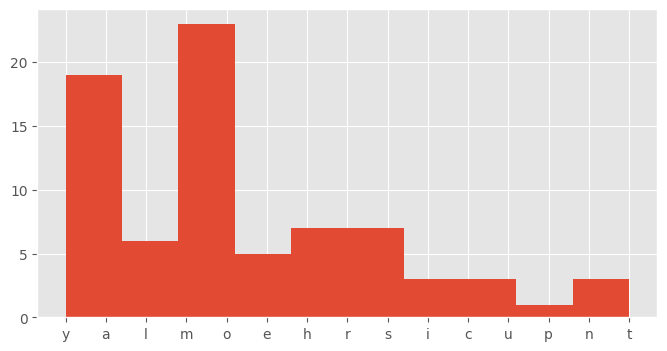

In [25]:
plt.figure( figsize=( 8,4 ) )

plt.hist([x[1] for x in centrality])

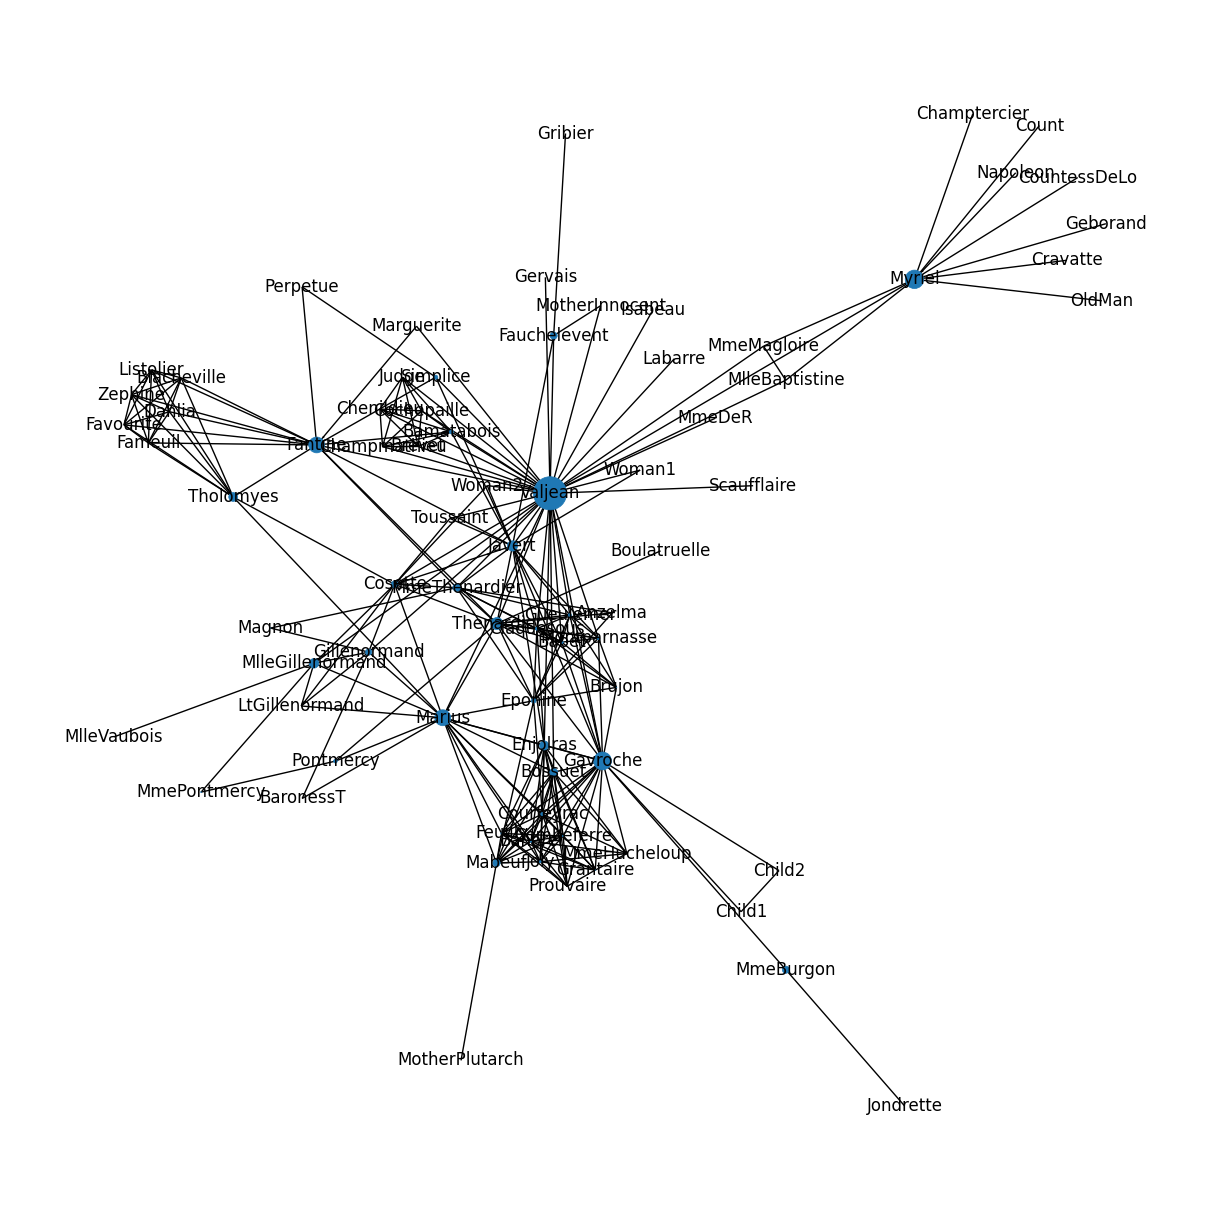

In [26]:
plt.figure( figsize=( 12,12 ) )

draw_network_fancy(lesmis, centrality, 1000)

### PageRank

[PageRank](https://en.wikipedia.org/wiki/PageRank) is used by Google to rank web pages on the Internet. It treats each web page as a node and each hyperlink as an edge. PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites. 

The PageRank value of a node corresponds to a probability distribution that someone clicking at a random link will arrive at this page.

For example, in a network with four nodes, A, B, C and D, and three links from A->D, B->D, and C->D, the probability of clicking a link that leads to D is 1. You can think of it that initially, all pages have the same probability of 0.25, and by linking to another page they transfer their PageRank to that site. 

When a site links to multiple pages, its PageRank is evenly distributed among the sites. For example, if A->C, A->D, C->D, D->A, B->D, A distributes half of it's PageRank to D, the other half to C, etc. 

This transferral is done over multiple iterations. In practice, the PageRank values can be approximated to within a high degree of accuracy within only a few iterations.

In [27]:
# Initialize the graph
abc=nx.DiGraph()

# Add nodes
abc.add_node("A")
abc.add_node("B")
abc.add_node("C")
abc.add_node("D")

# Add edges
abc.add_edge("A", "C")
abc.add_edge("A", "D")
abc.add_edge("C", "D")
abc.add_edge("D", "A")
abc.add_edge("B", "D")

print( list(abc.nodes()) )
print( list(abc.edges()) )

['A', 'B', 'C', 'D']
[('A', 'C'), ('A', 'D'), ('B', 'D'), ('C', 'D'), ('D', 'A')]


In [28]:
abc_pr = nx.pagerank( abc, alpha=1 )
abc_pr

{'A': 0.40000057220458984,
 'B': 0.0,
 'C': 0.20000028610229492,
 'D': 0.39999914169311523}

When calculating PageRank, pages with no outbound links are assumed to link out to all other pages in the collection. 

PageRank also introduces a damping factor alpha, where an imaginary surfer who is randomly clicking on links will eventually stop clicking. The probability, at any step, that the person will continue is the damping factor alpha.

In [29]:
abc_pr = nx.pagerank( abc, alpha=0.85 )
abc_pr

{'A': 0.3725262460913331,
 'B': 0.037500000000000006,
 'C': 0.19582365458881656,
 'D': 0.39415009931985034}

PageRank was designed for directed graphs. NetworkX's PageRank algorithm implementation treats undirected links as two directed links in each direction. For undirected graphs PageRank is not as valuable, as it follows the degree distribution. We can still look at the PageRank for the Les Miserables network.

In [30]:
pr = nx.pagerank( lesmis, alpha=0.9 )
sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]

[('Valjean', 0.07570137903943519),
 ('Myriel', 0.03965531861134031),
 ('Gavroche', 0.03739018829226064),
 ('Marius', 0.032383657652848966),
 ('Javert', 0.031346318732229914),
 ('Thenardier', 0.02884684060427124),
 ('Fantine', 0.027755222550265864),
 ('Enjolras', 0.023497258314513922),
 ('Cosette', 0.02099012418248578),
 ('Bossuet', 0.020281654531668154)]

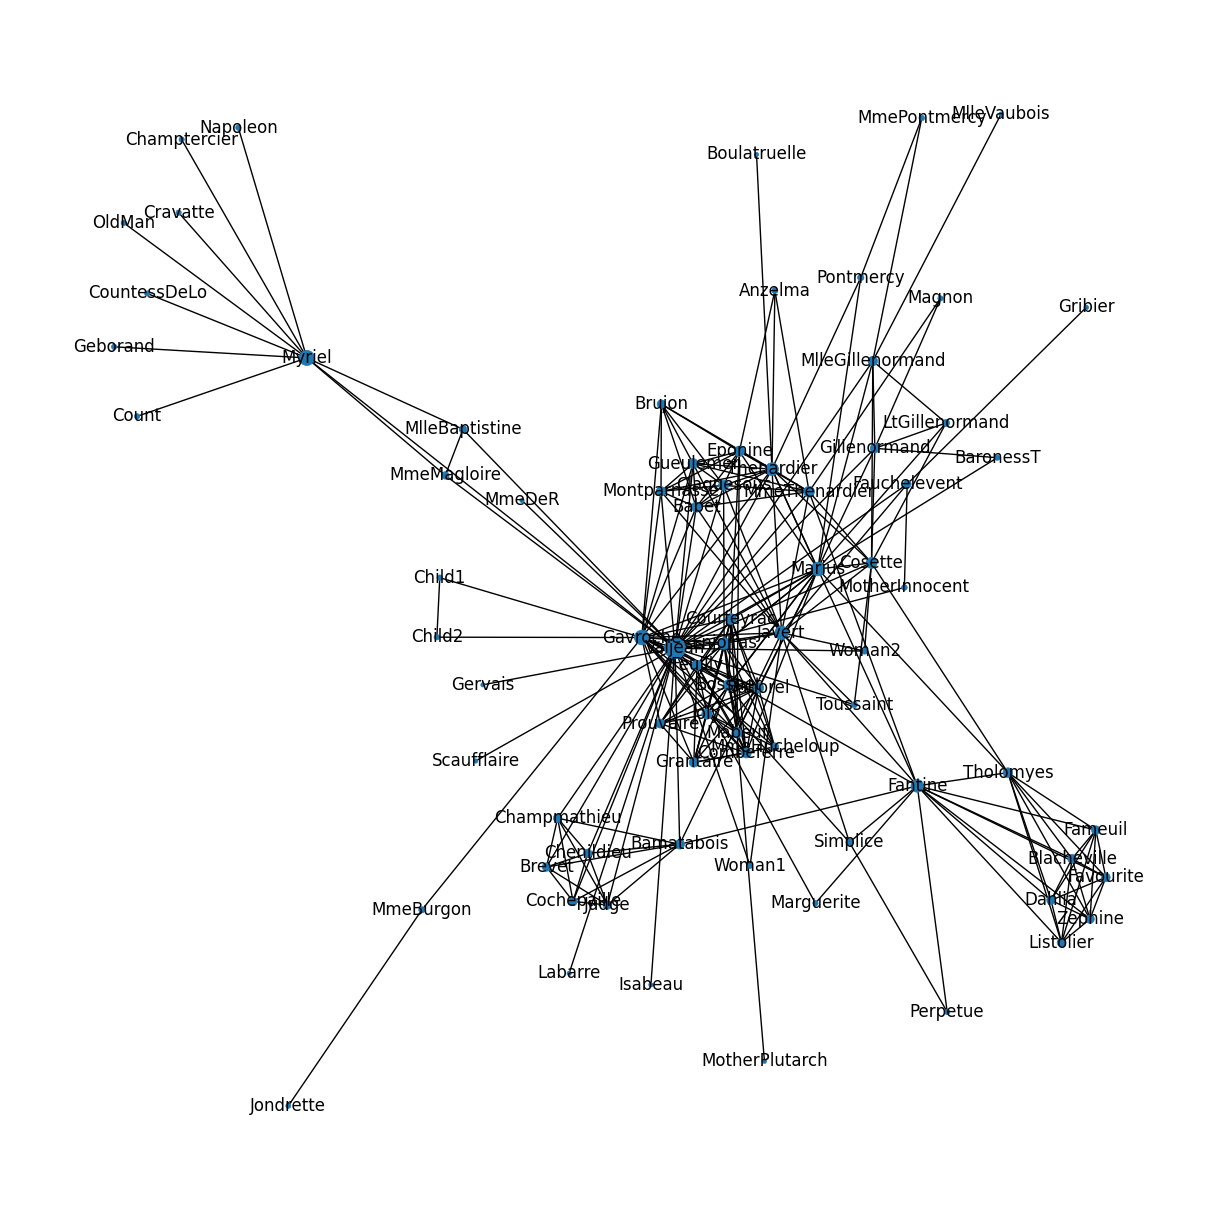

In [31]:
plt.figure( figsize=( 12,12 ) )

draw_network_fancy( lesmis, pr, 3000 )

### Comparison

Let's compare the distribution of these measures.

[('Myriel', 10), ('Napoleon', 1), ('MlleBaptistine', 3), ('MmeMagloire', 3), ('CountessDeLo', 1), ('Geborand', 1), ('Champtercier', 1), ('Cravatte', 1), ('Count', 1), ('OldMan', 1), ('Labarre', 1), ('Valjean', 36), ('Marguerite', 2), ('MmeDeR', 1), ('Isabeau', 1), ('Gervais', 1), ('Tholomyes', 9), ('Listolier', 7), ('Fameuil', 7), ('Blacheville', 7), ('Favourite', 7), ('Dahlia', 7), ('Zephine', 7), ('Fantine', 15), ('MmeThenardier', 11), ('Thenardier', 16), ('Cosette', 11), ('Javert', 17), ('Fauchelevent', 4), ('Bamatabois', 8), ('Perpetue', 2), ('Simplice', 4), ('Scaufflaire', 1), ('Woman1', 2), ('Judge', 6), ('Champmathieu', 6), ('Brevet', 6), ('Chenildieu', 6), ('Cochepaille', 6), ('Pontmercy', 3), ('Boulatruelle', 1), ('Eponine', 11), ('Anzelma', 3), ('Woman2', 3), ('MotherInnocent', 2), ('Gribier', 1), ('Jondrette', 1), ('MmeBurgon', 2), ('Gavroche', 22), ('Gillenormand', 7), ('Magnon', 2), ('MlleGillenormand', 7), ('MmePontmercy', 2), ('MlleVaubois', 1), ('LtGillenormand', 4), ('

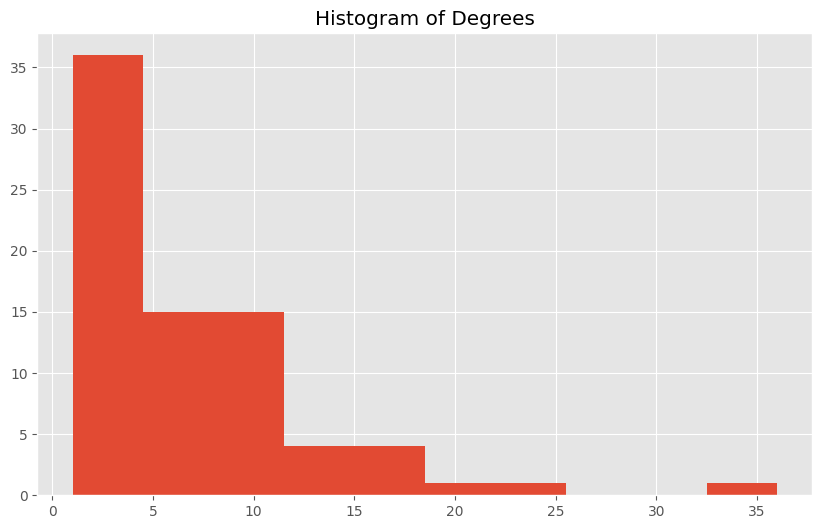

In [32]:
print(degree)
degrees = [d[1] for d in degree]
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(degrees)
plt.title('Histogram of Degrees')
plt.show()

dict_values([0.17684210526315788, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5699890527836184, 0.0, 0.0, 0.0, 0.0, 0.04062934817733579, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12964454098819422, 0.02900241873046176, 0.07490122123424225, 0.023796253454148188, 0.05433155966478436, 0.026491228070175437, 0.008040935672514621, 0.0, 0.008640295033483888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006925438596491228, 0.0, 0.011487550654163002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02631578947368421, 0.16511250242584766, 0.02021062158319776, 0.00021720969089390142, 0.047598927875243675, 0.0003508771929824561, 0.0, 0.0, 0.132032488621946, 0.0, 0.027661236424394314, 0.0425533568221771, 0.0012501455659350393, 0.0, 0.0012501455659350393, 0.00526702988198833, 0.0021854883087570067, 0.03075365017995782, 0.0021854883087570067, 0.00015037593984962405, 0.0, 0.004960383978389518, 0.004960383978389518, 0.00486180419559921, 0.0038738298738298727, 0.0, 0.0, 0.0, 0.00043859649122807013, 0.0])


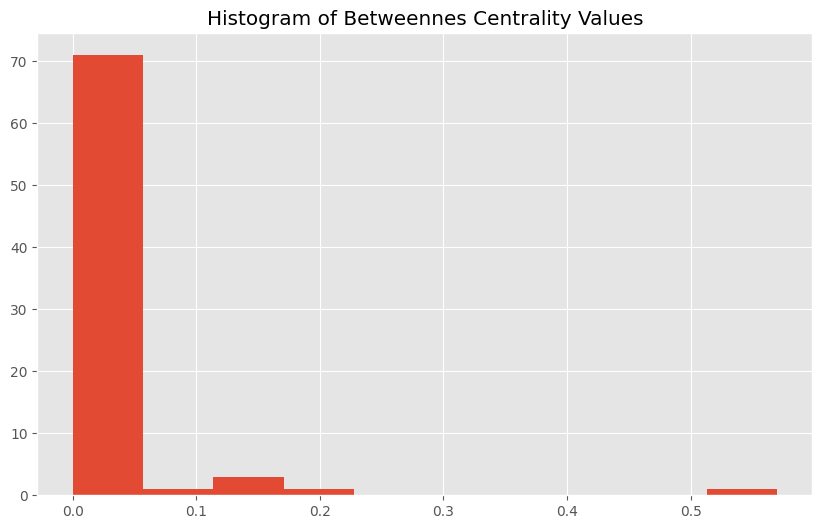

In [33]:
print(centrality.values())
centralities = centrality.values()
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(centralities)
plt.title('Histogram of Betweennes Centrality Values')
plt.show()

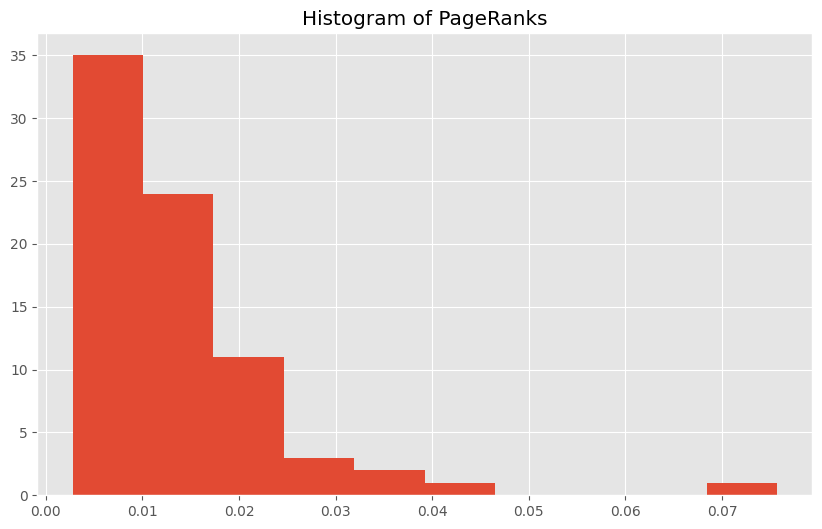

In [34]:
prs = pr.values()
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(prs)
plt.title('Histogram of PageRanks')
plt.show()

### Removing Nodes

We've seen that our network is highly centralized, let's explore what would happen if we removed Valjean, the central hub of the network. You can think of this as an important employee at a company leaving, or as a central node in a computer network or electric network going offline.

In [35]:
# new network, we might still need the old one
lesmis_cut = nx.read_gml( 'lesmis.gml' )
lesmis_cut.remove_node( 'Valjean' )

Let's take a look at the betweenness centrality and plot the network.

In [36]:
cut_centrality = nx.betweenness_centrality(lesmis_cut)
sorted(cut_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('Javert', 0.21898915298915309),
 ('Gavroche', 0.1447464346287876),
 ('Marius', 0.12495986066574306),
 ('Fantine', 0.1175229905229905),
 ('Bamatabois', 0.0990990990990991),
 ('Thenardier', 0.08518108747520516),
 ('Tholomyes', 0.05213595413595413),
 ('Cosette', 0.051857922857922865),
 ('Fauchelevent', 0.04216216216216216),
 ('Enjolras', 0.0396281462163815)]

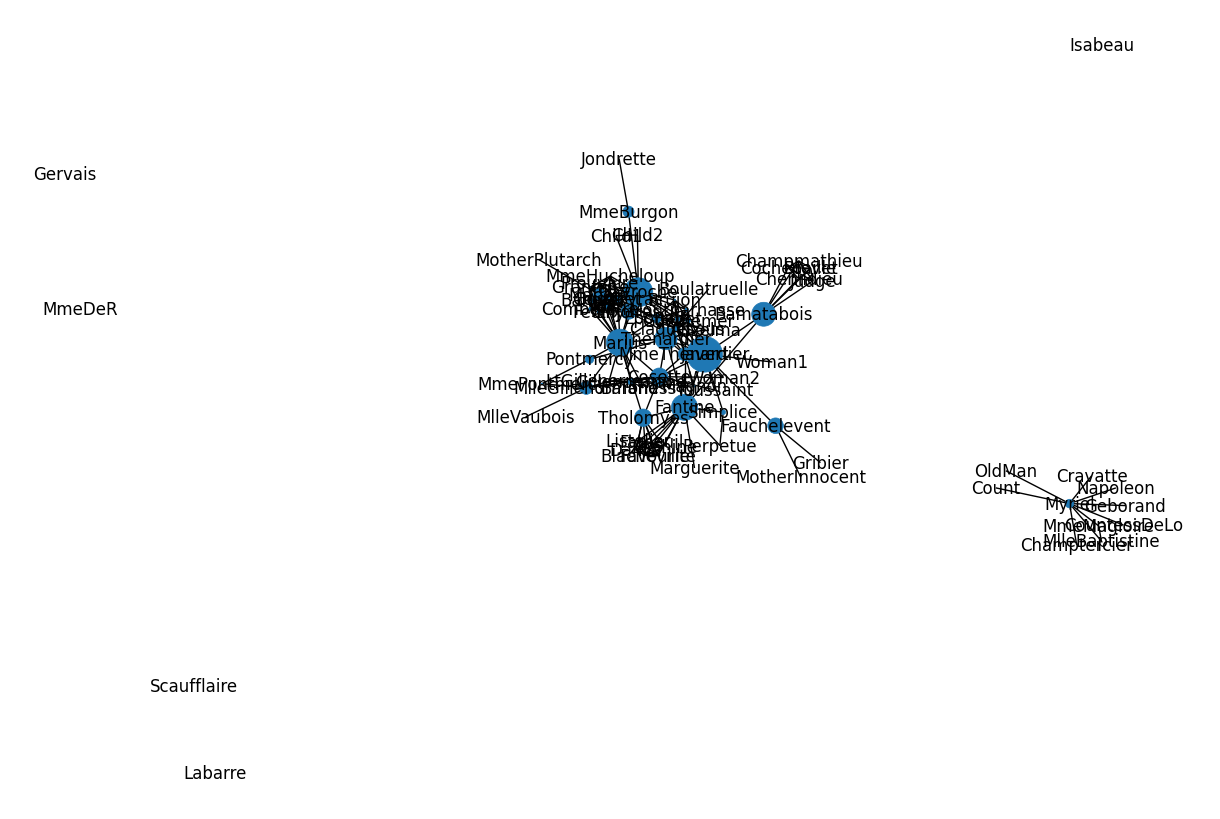

In [37]:
plt.figure( figsize=( 12,8 ) )

draw_network_fancy( lesmis_cut, cut_centrality, 3000 )

We can see that the graph is broken off into multiple unconnected components! Valjean was an articulation point that held the network together. 

In [38]:
nx.number_connected_components( lesmis_cut )

7

## Path Search

Path search, and in particular shortest path search is an important problem. It answers questions such as 
 * how do I get as quickly as possible from A to B in a road network
 * how to best rout a data package that delivers the next second of your Netflix movie
 * who can I talk to to get an introduction to Person B
 * etc.
 
There are two major types of path search algorithms: 

1. Algorithms that operate only on the topology, i.e., only the "distance" is relevant
2. Algorithms that also consider edge weights, i.e., they minimize a "cost"

For the above scenarios, edge weights make a lot of sense: I might give a different weight to an edge that is an Interstate, for example, as I will be able to travel faster. 

### Breath First Seach

Breath first search is a simple algorithm that solves the single-source shortest path problem, i.e., it calculates the shortest path from one source to all other nodes in the network. 

The algorithm works as follows:

1. Label source node 0
2. Find neighbors, label 1, put in queue
3. Take node labeled n (1 for first step) out of queue. Find its unlabeled neighbors. Label them n+1 and put in queue
4. Repeat 3 until found node (if only the exact path is relevant)  or no nodes left (when looking for all shortest paths)
5. The distance between start and end node is the label of the end node.

Let's look at the path from Boulatruelle to Napoleon:

In [39]:
path = nx.shortest_path( lesmis, source="Boulatruelle", target="Marius" )
path

['Boulatruelle', 'Thenardier', 'Marius']

And the path from Perpetue to Napoleon:

In [40]:
path = nx.shortest_path(lesmis, source="Perpetue", target="Napoleon")
path

['Perpetue', 'Fantine', 'Valjean', 'Myriel', 'Napoleon']

### Dijkstra's Algorithm

[Dijkstra's algoritm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) is the go-to algorithm for finding paths in a weigthed graph.

Let the node at which we are starting be called the initial node. Let the distance of node Y be the distance from the initial node to Y. Dijkstra's algorithm will assign some initial distance values and will try to improve them step by step.
1. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes.
2. Set the initial node as current. Mark all other nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.
3. For the current node, consider all of its unvisited neighbors and calculate their tentative distances. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node A is marked with a distance of 6, and the edge connecting it with a neighbor B has length 2, then the distance to B (through A) will be 6 + 2 = 8. If B was previously marked with a distance greater than 8 then change it to 8. Otherwise, keep the current value.
4. When we are done considering all of the neighbors of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.
5. If the destination node has been marked visited (when planning a route between two specific nodes) or if the smallest tentative distance among the nodes in the unvisited set is infinity (when planning a complete traversal; occurs when there is no connection between the initial node and remaining unvisited nodes), then stop. The algorithm has finished.
6. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3.

Here' is an animation for Dijkstra's Algorithm from Wikipedia (we'll go through this in class):

![network](https://en.wikipedia.org/wiki/File:Dijkstra_Animation.gif)

Here is an illustration of Dijkstra's Algorithm for a motion planning task:

![Local](Dijkstras_progress_animation.gif)

Our Les Miserables dataset actually comes with edge weights. The weight describes the number of co-occurrences of the characters. Now, let's look at the values:

In [41]:
lesmis.edges( data=True )

EdgeDataView([('Myriel', 'Napoleon', {'value': 1}), ('Myriel', 'MlleBaptistine', {'value': 8}), ('Myriel', 'MmeMagloire', {'value': 10}), ('Myriel', 'CountessDeLo', {'value': 1}), ('Myriel', 'Geborand', {'value': 1}), ('Myriel', 'Champtercier', {'value': 1}), ('Myriel', 'Cravatte', {'value': 1}), ('Myriel', 'Count', {'value': 2}), ('Myriel', 'OldMan', {'value': 1}), ('Myriel', 'Valjean', {'value': 5}), ('MlleBaptistine', 'MmeMagloire', {'value': 6}), ('MlleBaptistine', 'Valjean', {'value': 3}), ('MmeMagloire', 'Valjean', {'value': 3}), ('Labarre', 'Valjean', {'value': 1}), ('Valjean', 'Marguerite', {'value': 1}), ('Valjean', 'MmeDeR', {'value': 1}), ('Valjean', 'Isabeau', {'value': 1}), ('Valjean', 'Gervais', {'value': 1}), ('Valjean', 'Fantine', {'value': 9}), ('Valjean', 'MmeThenardier', {'value': 7}), ('Valjean', 'Thenardier', {'value': 12}), ('Valjean', 'Cosette', {'value': 31}), ('Valjean', 'Javert', {'value': 17}), ('Valjean', 'Fauchelevent', {'value': 8}), ('Valjean', 'Bamataboi

First we run the algorithm without weights:

In [42]:
path = nx.dijkstra_path( lesmis, source="Perpetue", target="Napoleon" )
path

['Perpetue', 'Fantine', 'Valjean', 'Myriel', 'Napoleon']

And then we run it with the weights, to have a comparison:

In [43]:
weighted_path = nx.dijkstra_path( lesmis, source="Perpetue", target="Napoleon", weight="value" )
weighted_path

['Perpetue', 'Fantine', 'Bamatabois', 'Valjean', 'Myriel', 'Napoleon']

We can calculate the relative weights of these paths:

In [44]:
def getPathCost(path):
    length = len(path)
    weight = 0
    for i in range(length-1):
        attributes = lesmis[path[i]][path[i+1]]
        weight += attributes["value"]
        print(path[i], path[i+1], attributes)
    print("Weight:", weight)
    
print("Shortest Path")
getPathCost(path)

print("\n ==== \n")

print("Weighted Path")    
getPathCost(weighted_path)


Shortest Path
Perpetue Fantine {'value': 1}
Fantine Valjean {'value': 9}
Valjean Myriel {'value': 5}
Myriel Napoleon {'value': 1}
Weight: 16

 ==== 

Weighted Path
Perpetue Fantine {'value': 1}
Fantine Bamatabois {'value': 1}
Bamatabois Valjean {'value': 2}
Valjean Myriel {'value': 5}
Myriel Napoleon {'value': 1}
Weight: 10


### The A* Algorithm - Path Finding using Heuristics

Dijkstra is a great general algorithm, but it can be slow. 

If we know more about the network we're working with, we can use a more efficient algorithm that takes this information into account. For example, in motion planning and in route planning on a map, we know where the target point is located spatially, relative to the source point. We can take this information into account by using a heuristic function to refine the search. 

The [A* algoritm](https://en.wikipedia.org/wiki/A*_search_algorithm) is such an algorithm. It's based on Djikstra's algorithm, but uses a heuristic function to guide it's search into the right direction. A* is an informed search algorithm, or a best-first search, meaning that it solves problems by searching among all possible paths to the solution (goal) for the one that incurs the smallest cost (least distance traveled, shortest time, etc.), and among these paths it first considers the ones that appear to lead most quickly to the solution. 

At each step of the algorithm, A* evaluates which is the best paths to follow

See the following example:

![](Astar_progress_animation.gif)

While [NetworkX](https://networkx.readthedocs.io/en/stable/reference/algorithms.shortest_paths.html#module-networkx.algorithms.shortest_paths.astar) provides an implementation of the A* algorithm, we are not able to define a meaningful heuristic function for the Les Miserables graph, so we can't use it on this graph.

## Exercise

Explore the [Karate Club](https://networkx.readthedocs.io/en/stable/reference/generated/networkx.generators.social.karate_club_graph.html#networkx.generators.social.karate_club_graph) network:

 * How many nodes, how many edges are in the network? 
 * Are there nodes of high betweenness centrality? Visualize the network.
 * Remove the node with the highest centrality. How many components do you have?